In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
# IBMQ.load_account()
# provider = IBMQ.get_provider('ibm-q')
# name = 'ibmqx2'
# backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
import sys
sys.path.insert(1, '../Scripts')
from expfuncs import *
warnings.filterwarnings('ignore')

interested_qubits = [4,3,2,1]
itr = 16
QDT_correlated = False
noise_file_address = 'Noise/'
#all_methods_data(interested_qubits,backend, itr, QDT_correlated, file_address = noise_file_address)

In [3]:
# Collect QAOA Data
file_address = 'T5/'
# QAOAexp(backend,file_address =file_address)

In [4]:
# Create Filters
our_filter, qiskit_filter, QDT_filter, SB_filter = create_filters(interested_qubits,QDT_correlated, from_file = True, file_address = noise_file_address)

Standard Bayesian filter
Our Filter
Qiskit filter
QDT filter


In [5]:
# Read QAOA data
with open(file_address + 'Count_QAOA.csv', mode='r') as sgm:
    reader = csv.reader(sgm)
    temp_counts = {}
    for row in reader:   
        temp_counts[row[0]] = int(row[1])
real_counts = {}
for key in temp_counts.keys():
    real_counts[key[0:4]] = temp_counts[key]
    
with open(file_address + 'Count_QAOA_Simulator.csv', mode='r') as sgm:
    reader = csv.reader(sgm)
    st_counts = {}
    for row in reader:   
        st_counts[row[0]] = int(row[1])
simu_counts = {}
for key in temp_counts.keys():
    simu_counts[key[0:4]] = st_counts[key]

In [6]:
# Filtering
mean_counts = our_filter.filter_mean(real_counts)
mode_counts = our_filter.filter_mode(real_counts)
qis_counts = qiskit_filter.apply(real_counts)
QDT_counts = QDT_filter.filter(real_counts)
sbmean_counts = SB_filter.filter_mean(real_counts)
sbmode_counts = SB_filter.filter_mode(real_counts)

6 solutions are  ['0110', '0010', '1001', '1010', '1101', '0101']
Probabilit of Optimal Solutions
Simulator:  0.89401
Real Device:  0.5748291015625
Qiskit Method:  0.6139548533515599
QDT:  0.6330645161290323
SB Mean:  0.6786805131337813
SB Mode:  0.6309421972381767
Mean:  0.6810018326206475
Mode:  0.643904226728561


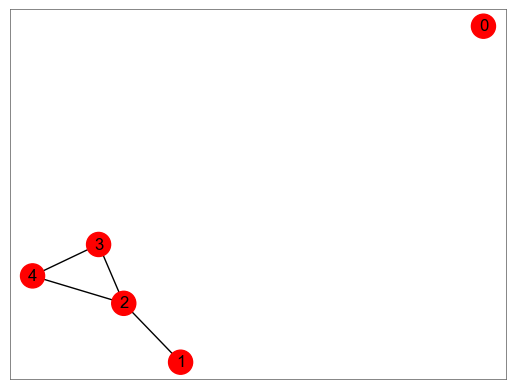

In [7]:
from QAOAfuncs import *
import networkx as nx
# Construction the graph
n     = 5
V     = np.arange(0,n,1)
E     =[(1,2,1.0),(2,3,1.0),(3,4,1.0),(2,4,1.0)] 

G     = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

# Generate plot of the Graph
colors       = ['r' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(G)

count  = 0
sols = []
for sample in list(real_counts.keys()):
    # use sampled bit string x to compute C(x)
    x         = [int(num) for num in list(sample)]
    x.append(0)
    tmp_eng   = cost_function_C(x,G)
    if tmp_eng == 3:
        count += 1
        sols.append(sample)
nx.draw_networkx(G, node_color=colors, node_size=300, alpha=1, ax=default_axes, pos=pos)
print('{} solutions are '.format(count),sols)
print('Probabilit of Optimal Solutions')
print('Simulator: ',optimalProb(simu_counts,sols))
print('Real Device: ',optimalProb(real_counts,sols))
print('Qiskit Method: ',optimalProb(qis_counts,sols))
print('QDT: ',optimalProb(QDT_counts,sols))
print('SB Mean: ',optimalProb(sbmean_counts,sols))
print('SB Mode: ',optimalProb(sbmode_counts,sols))
print('Mean: ',optimalProb(mean_counts,sols))
print('Mode: ',optimalProb(mode_counts,sols))

In [8]:
data_shots = 8192

print('Simulator')
simuM1,simuMax_C,_ = QAOAopt(G,simu_counts,100000)
print('Real Device')
realM1,realMax_C,_ = QAOAopt(G,real_counts,data_shots)
print('Qiskit Method')
qisM1,qisMax_C,_ = QAOAopt(G,qis_counts,data_shots)
print('QDT')
QDTM1,QDTMax_C,_ = QAOAopt(G,QDT_counts,data_shots)
print('SB Mean')
sbmeanM1,sbmeanMax_C,_ = QAOAopt(G,sbmean_counts,data_shots)
print('SB Mode')
sbmodeM1,sbmodeMax_C,_ = QAOAopt(G,sbmode_counts,data_shots)
print('Mean')
meanM1,meanMax_C,_ = QAOAopt(G,mean_counts,data_shots)
print('Mode')
modeM1,modeMax_C,_ = QAOAopt(G,mode_counts,data_shots)

Simulator
M_sampled = 2.8642, solution is 0110 with C(x*) = 3  

Real Device
M_sampled = 2.3063, solution is 0110 with C(x*) = 3  

Qiskit Method
M_sampled = 2.4063, solution is 0010 with C(x*) = 3  

QDT
M_sampled = 2.3851, solution is 0010 with C(x*) = 3  

SB Mean
M_sampled = 2.4860, solution is 0010 with C(x*) = 3  

SB Mode
M_sampled = 2.4059, solution is 0010 with C(x*) = 3  

Mean
M_sampled = 2.4891, solution is 0010 with C(x*) = 3  

Mode
M_sampled = 2.4382, solution is 0010 with C(x*) = 3  

